In [46]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [47]:
def conf_matrix(y, y_pred, title, labels):
    fig, ax =plt.subplots(figsize=(7.5,7.5))
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Purples", fmt='g', cbar=False, annot_kws={"size":30})
    plt.title(title, fontsize=25)
    ax.xaxis.set_ticklabels(labels, fontsize=16) 
    ax.yaxis.set_ticklabels(labels, fontsize=14.5)
    ax.set_ylabel('Test', fontsize=25)
    ax.set_xlabel('Predicted', fontsize=25)
    plt.show()

In [48]:
# pip install langdetect

In [49]:
# pip install contractions

In [50]:
# Libraries for general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text cleaning
import re
import string
import emoji
import demoji
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords

# Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from langdetect import detect, LangDetectException
import contractions
from nltk.tokenize import word_tokenize

# Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# PyTorch LSTM
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Tokenization for LSTM
from collections import Counter
from gensim.models import Word2Vec

# Transformers library for BERT
import transformers
from transformers import BertModel
from transformers import BertTokenizer
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import classification_report, confusion_matrix

import time

# Set seed for reproducibility
import random
seed_value = 2042
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)

# Set style for plots

# import seaborn as sns
# import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

# sns.set_style("whitegrid")
# sns.despine()
# plt.style.use("seaborn-whitegrid")
# plt.rc("figure", autolayout=True)
# plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

# Define stop words for text cleaning
stop_words = set(stopwords.words('english'))

# Initialize lemmatizer for text cleaning
lemmatizer = WordNetLemmatizer()

In [51]:
df = pd.read_csv("cyberbullying_tweets.csv")

In [52]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [54]:
df = df.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})

In [55]:
df.duplicated().sum()


36

In [56]:
df = df[~df.duplicated()]


In [57]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 47656 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       47656 non-null  object
 1   sentiment  47656 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [58]:
df.sentiment.value_counts()


sentiment
religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: count, dtype: int64

In [59]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

cat1 = df['text_clean'][df['sentiment']==0].to_string()
wordcloud_cat1 = WordCloud(width = 800, height = 800, 
                               background_color ='white', stopwords = stopwords,
                               min_font_size = 10).generate(cat1)

cat2 = df['text_clean'][df['sentiment']==1].to_string()
wordcloud_cat2 = WordCloud(width = 800, height = 800, 
                               background_color ='white', stopwords = stopwords,
                               min_font_size = 10).generate(cat2)
cat3 = df['text_clean'][df['sentiment']==2].to_string()
wordcloud_cat3 = WordCloud(width = 800, height = 800, 
                               background_color ='white', stopwords = stopwords,
                               min_font_size = 10).generate(cat3)

cat4 = df['text_clean'][df['sentiment']==3].to_string()
wordcloud_cat4 = WordCloud(width = 800, height = 800, 
                               background_color ='white', stopwords = stopwords,
                               min_font_size = 10).generate(cat4)
cat5 = df['text_clean'][df['sentiment']==4].to_string()
wordcloud_cat5 = WordCloud(width = 800, height = 800, 
                               background_color ='white', stopwords = stopwords,
                               min_font_size = 10).generate(cat5)
cat6= df['text_clean'][df['sentiment']==5].to_string()
wordcloud_cat6 = WordCloud(width = 800, height = 800, 
                               background_color ='white', stopwords = stopwords,
                               min_font_size = 10).generate(cat6)


KeyError: 'text_clean'

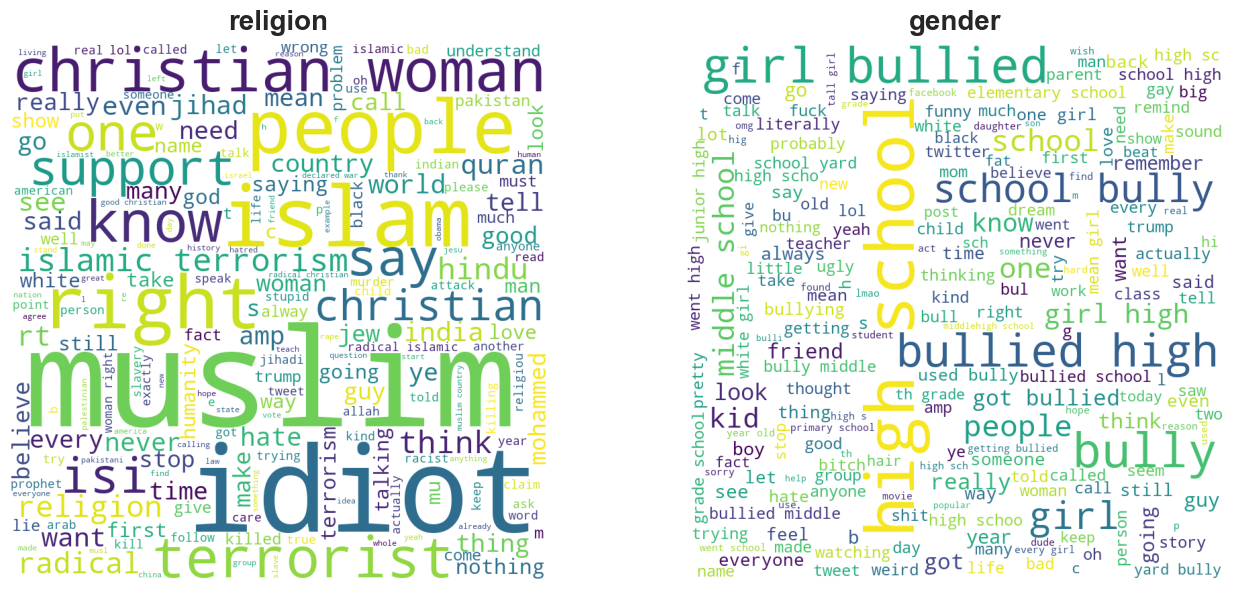

In [ ]:
# Plotting the WordCloud images                     
plt.figure(figsize=(14, 6), facecolor = None)

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_cat1)
plt.axis("off")
plt.title('religion', fontdict={'fontsize': 20})

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_cat2)
plt.axis("off")
plt.title('gender', fontdict={'fontsize': 20})

plt.tight_layout() 
plt.show()

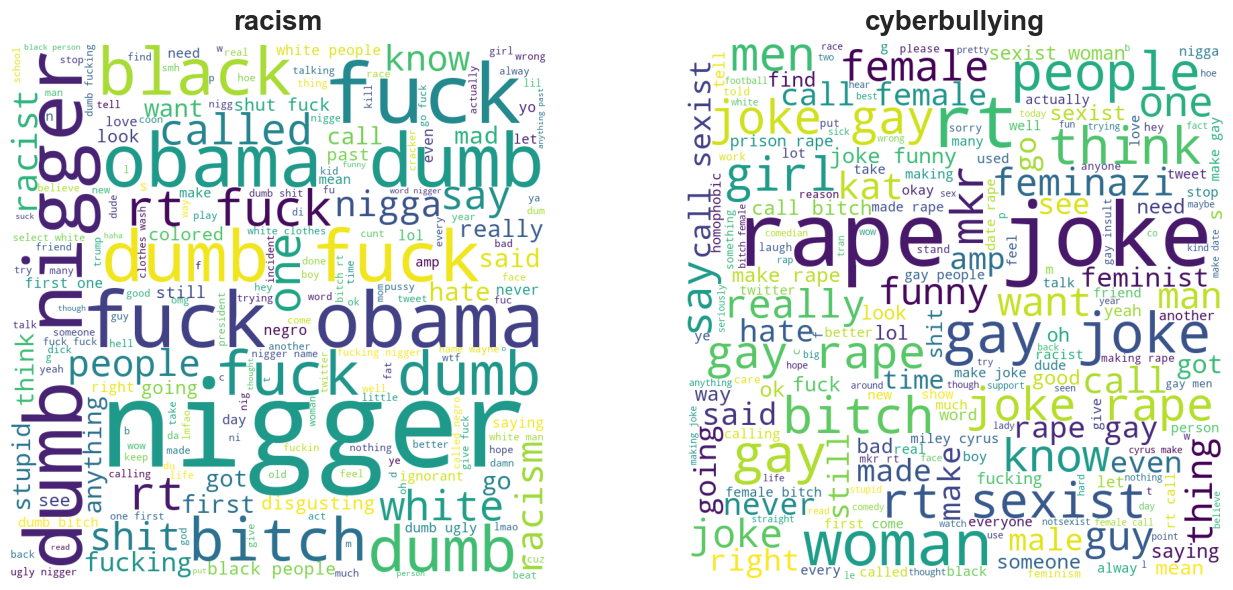

In [ ]:
plt.figure(figsize=(14, 6), facecolor = None)

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_cat3)
plt.axis("off")
plt.title('racism', fontdict={'fontsize': 20})

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_cat4)
plt.axis("off")
plt.title('cyberbullying', fontdict={'fontsize': 20})

plt.tight_layout() 
plt.show()

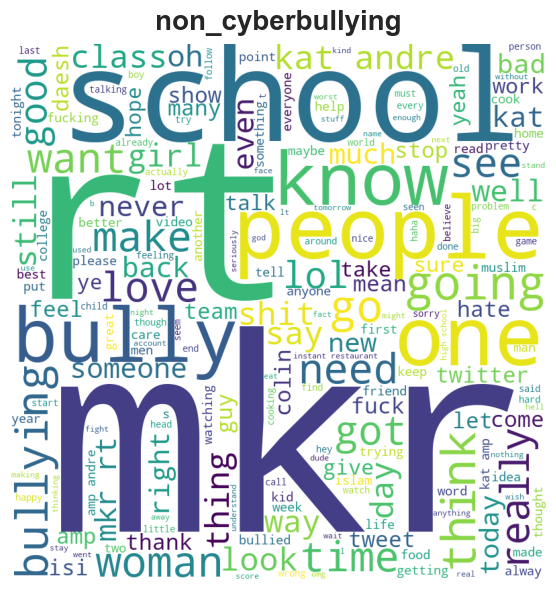

In [ ]:
plt.figure(figsize=(14, 6), facecolor = None)

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_cat5)
plt.axis("off")
plt.title('non_cyberbullying', fontdict={'fontsize': 20})

plt.tight_layout() 
plt.show()

In [60]:
# Clean emojis from text
# def strip_emoji(text):
#     return emoji.get_emoji_regexp().sub("", text)
def strip_emoji(text):
    return demoji.replace(text, '')

# Remove punctuations, stopwords, links, mentions and new line characters
def strip_all_entities(text):
    text = re.sub(r'\r|\n', ' ', text.lower())  # Replace newline and carriage return with space, and convert to lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)  # Remove links and mentions
    text = re.sub(r'[^\x00-\x7f]', '', text)  # Remove non-ASCII characters
    banned_list = string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    # Remove hashtags at the end of the sentence
    new_tweet = re.sub(r'(\s+#[\w-]+)+\s*$', '', tweet).strip()
    
    # Remove the # symbol from hashtags in the middle of the sentence
    new_tweet = re.sub(r'#([\w-]+)', r'\1', new_tweet).strip()
    
    return new_tweet

# Filter special characters such as & and $ present in some words
def filter_chars(text):
    return ' '.join('' if ('$' in word) or ('&' in word) else word for word in text.split())

# Remove multiple spaces
def remove_mult_spaces(text):
    return re.sub(r"\s\s+", " ", text)

# Function to check if the text is in English, and return an empty string if it's not
def filter_non_english(text):
    try:
        lang = detect(text)
    except LangDetectException:
        lang = "unknown"
    return text if lang == "en" else ""

# Expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Lemmatize words
def lemmatize(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Remove short words
def remove_short_words(text, min_len=2):
    words = text.split()
    long_words = [word for word in words if len(word) >= min_len]
    return ' '.join(long_words)

# Replace elongated words with their base form
def replace_elongated_words(text):
    regex_pattern = r'\b(\w+)((\w)\3{2,})(\w*)\b'
    return re.sub(regex_pattern, r'\1\3\4', text)

# Remove repeated punctuation
def remove_repeated_punctuation(text):
    return re.sub(r'[\?\.\!]+(?=[\?\.\!])', '', text)

# Remove extra whitespace
def remove_extra_whitespace(text):
    return ' '.join(text.split())

def remove_url_shorteners(text):
    return re.sub(r'(?:http[s]?://)?(?:www\.)?(?:bit\.ly|goo\.gl|t\.co|tinyurl\.com|tr\.im|is\.gd|cli\.gs|u\.nu|url\.ie|tiny\.cc|alturl\.com|ow\.ly|bit\.do|adoro\.to)\S+', '', text)

# Remove spaces at the beginning and end of the tweet
def remove_spaces_tweets(tweet):
    return tweet.strip()

# Remove short tweets
def remove_short_tweets(tweet, min_words=3):
    words = tweet.split()
    return tweet if len(words) >= min_words else ""

# Function to call all the cleaning functions in the correct order
def clean_tweet(tweet):
    tweet = strip_emoji(tweet)
    tweet = expand_contractions(tweet)
    tweet = filter_non_english(tweet)
    tweet = strip_all_entities(tweet)
    tweet = clean_hashtags(tweet)
    tweet = filter_chars(tweet)
    tweet = remove_mult_spaces(tweet)
    tweet = remove_numbers(tweet)
    tweet = lemmatize(tweet)
    tweet = remove_short_words(tweet)
    tweet = replace_elongated_words(tweet)
    tweet = remove_repeated_punctuation(tweet)
    tweet = remove_extra_whitespace(tweet)
    tweet = remove_url_shorteners(tweet)
    tweet = remove_spaces_tweets(tweet)
    tweet = remove_short_tweets(tweet)
    tweet = ' '.join(tweet.split())  # Remove multiple spaces between words
    return tweet

In [61]:
# import nltk
# nltk.download('punkt')
# nltk.download('wordnet')

In [62]:
df['text_clean'] = [clean_tweet(tweet) for tweet in df['text']]

In [63]:
df.head()

,text,sentiment,text_clean
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks head concerned another angry dude t...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretending kurdish account like is...


In [64]:
print(f'There are around {int(df["text_clean"].duplicated().sum())} duplicated tweets, we will remove them.')

There are around 6266 duplicated tweets, we will remove them.


In [65]:
df.drop_duplicates("text_clean", inplace=True)

In [66]:
df.sentiment.value_counts()

sentiment
religion               7914
age                    7813
ethnicity              7411
gender                 7278
not_cyberbullying      6065
other_cyberbullying    4909
Name: count, dtype: int64

In [67]:
df = df[df["sentiment"]!="other_cyberbullying"]

In [68]:
df.shape

(36481, 3)

In [69]:
sentiments = ["religion","age","ethnicity","gender","not bullying"]


In [70]:
df['text_len'] = [len(text.split()) for text in df.text_clean]

C:\Users\v.soumy.prajapati\AppData\Local\Temp\ipykernel_10088\956491095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_len'] = [len(text.split()) for text in df.text_clean]


In [71]:
# plt.figure(figsize=(7,5))
# ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
# plt.title('Count of tweets with less than 10 words', fontsize=20)
# plt.yticks([])
# ax.bar_label(ax.containers[0])
# plt.ylabel('count')
# plt.xlabel('')
# plt.show()


C:\Users\v.soumy.prajapati\AppData\Local\Temp\ipykernel_10088\1811056788.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')


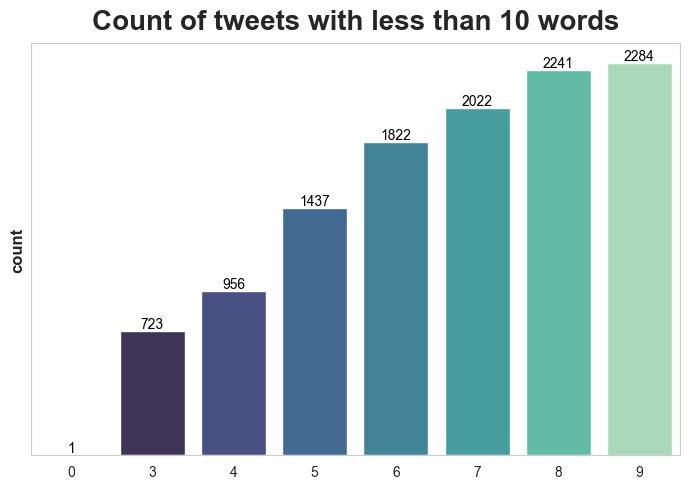

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.ylabel('count')
plt.xlabel('')
plt.show()

In [73]:
df.sort_values(by=['text_len'], ascending=False)

,text,sentiment,text_clean,text_len
44035,You so black and white trying to live like a n...,ethnicity,black white trying live like nigger pahahahaha...,173
45165,"@hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...",ethnicity,fuck obama dumb as nigger bitch ltthis whore s...,151
1317,@EurekAlertAAAS: Researchers push to import to...,not_cyberbullying,researcher push import top antibullying progra...,138
33724,"... I don't feel guilty for killing him, I jus...",age,feel guilty killing feel guilty enjoyed tormen...,136
10922,don't make rape jokes!!! don't make gay jokes!...,gender,make rape joke make gay joke oh fat joke okay ...,121
...,...,...,...,...
1356,@DavidRomeiPHD @ALWiss5 Why should Bush answer...,not_cyberbullying,bush answer answered,3
7893,@twoscooters @Official_PAX @ShaofHappiness i a...,not_cyberbullying,surprised slightest wish,3
1348,It's a cutie on my TL lol,not_cyberbullying,cutie tl lol,3
20363,@dankmtl what they tell you is their intention...,religion,tell intention intention,3


C:\Users\v.soumy.prajapati\AppData\Local\Temp\ipykernel_10088\2060477503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='text_len', data=df[(df['text_len']<=1000) & (df['text_len']>10)], palette='Blues_r')


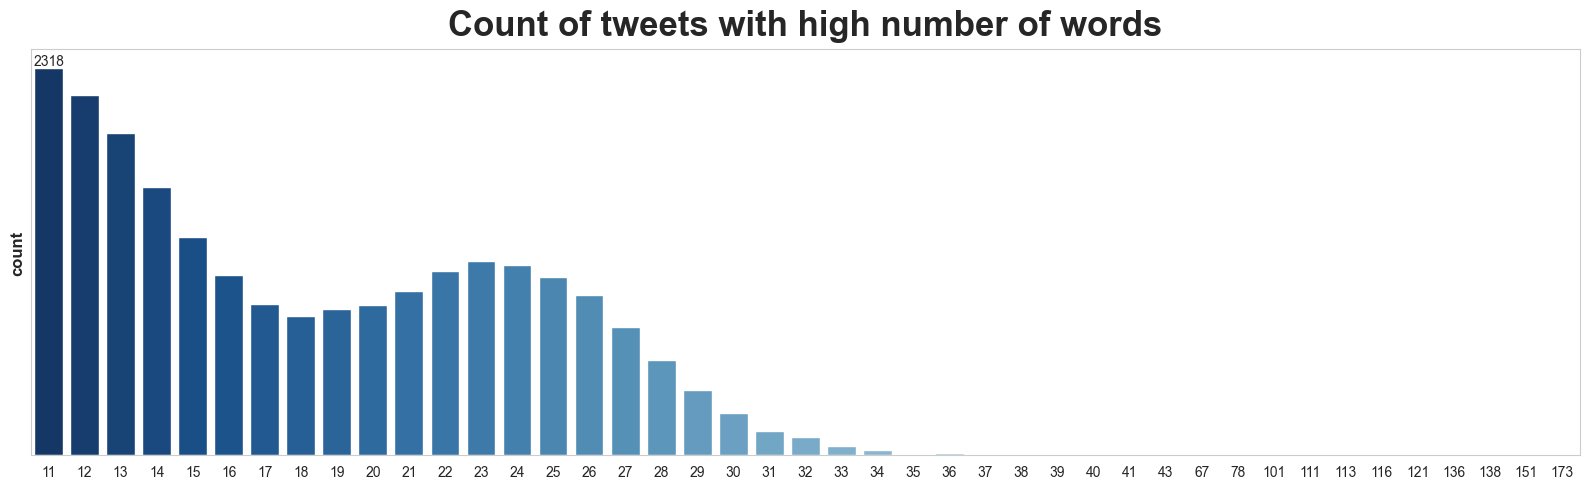

In [74]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='text_len', data=df[(df['text_len']<=1000) & (df['text_len']>10)], palette='Blues_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [75]:
df = df[df['text_len'] < df['text_len'].quantile(0.995)]


In [76]:
max_len = np.max(df['text_len'])
max_len 

31

In [77]:
df.sort_values(by=["text_len"], ascending=False)


,text,sentiment,text_clean,text_len
37438,Or the very shy quiet tomboy girl that sat in ...,age,shy quiet tomboy girl sat back class like spea...,31
22532,If something is bad then it is bad. Donnow wy ...,religion,something bad bad donnow wy people compare oth...,31
37404,•getting called “anorexic” and “bones” since 3...,age,getting called anorexic bone since rd grade hi...,31
34374,Sure #MAGAts think that. In poor uneducated #M...,age,sure magats think poor uneducated maga househo...,31
15269,Gay men earn more than women. Are less likely ...,gender,gay men earn woman le likely victim rape domes...,31
...,...,...,...,...
14152,FAN with Miss Hottie 💁😊❤️,gender,fan miss hottie,3
17440,Why don't u speak on islamic terrorism,religion,speak islamic terrorism,3
9214,@pixieyas @greenlinerzjm @versacezaynx @nyazpo...,gender,quran say bitch,3
1177,No more school for today lol,not_cyberbullying,school today lol,3


In [78]:
df['sentiment'] = df['sentiment'].replace({'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4})


In [79]:
X = df['text_clean']
y = df['sentiment']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed_value)

In [81]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=seed_value)

In [82]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 5014],
       [   1, 4966],
       [   2, 4705],
       [   3, 4627],
       [   4, 3880]], dtype=int64)

In [83]:
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in X_train], y_train)), columns = ['text_clean', 'sentiment']);

In [84]:
X_train = train_os['text_clean'].values
y_train = train_os['sentiment'].values

In [85]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 5014],
       [   1, 5014],
       [   2, 5014],
       [   3, 5014],
       [   4, 5014]], dtype=int64)

In [86]:
clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)

In [89]:
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)
# X_train_tf_rf = tf_transformer.transform(X_train_cv)
# X_test_tf_rf = tf_transformer.transform(X_test_cv)

In [90]:
nb_clf = MultinomialNB()

In [91]:
nb_clf.fit(X_train_tf, y_train)


MultinomialNB()

In [92]:
nb_pred = nb_clf.predict(X_test_tf)


In [93]:
print('Classification Report for Naive Bayes:\n',classification_report(y_test, nb_pred, target_names=sentiments))


Classification Report for Naive Bayes:
               precision    recall  f1-score   support

    religion       0.85      0.96      0.90      1567
         age       0.80      0.98      0.88      1552
   ethnicity       0.88      0.92      0.90      1471
      gender       0.88      0.83      0.86      1446
not bullying       0.79      0.45      0.57      1212

    accuracy                           0.85      7248
   macro avg       0.84      0.83      0.82      7248
weighted avg       0.84      0.85      0.83      7248



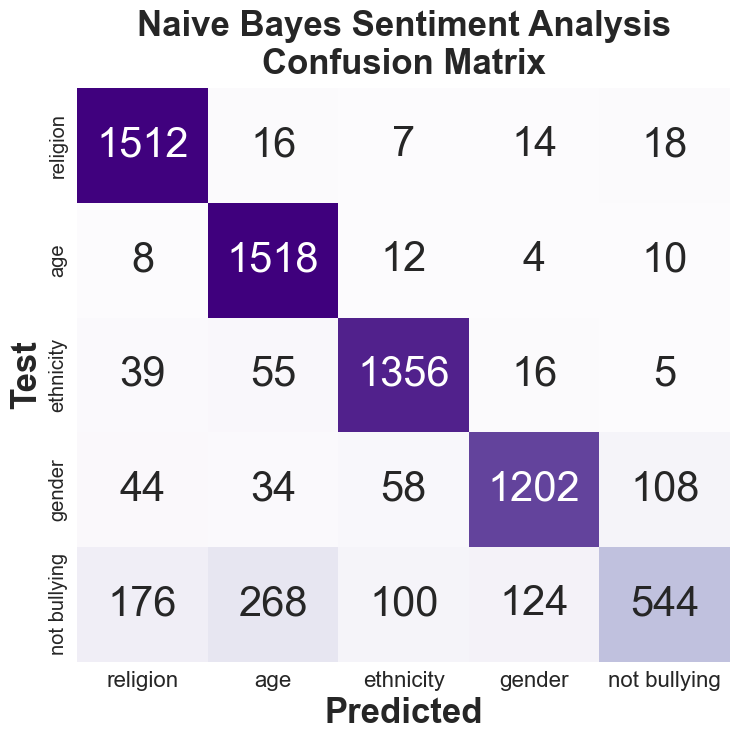

In [94]:
conf_matrix(y_test,nb_pred,'Naive Bayes Sentiment Analysis\nConfusion Matrix', sentiments)


In [95]:
rfc = RandomForestClassifier(n_estimators=15, random_state=40)
rfc.fit(X_train_tf, y_train)

RandomForestClassifier(n_estimators=15, random_state=40)

In [97]:
rfc_pred = rfc.predict(X_test_tf)

In [98]:
print('Classification Report for Naive Bayes:\n',classification_report(y_test, rfc_pred, target_names=sentiments))


Classification Report for Naive Bayes:
               precision    recall  f1-score   support

    religion       0.95      0.95      0.95      1567
         age       0.97      0.97      0.97      1552
   ethnicity       0.99      0.98      0.98      1471
      gender       0.93      0.84      0.89      1446
not bullying       0.76      0.85      0.80      1212

    accuracy                           0.92      7248
   macro avg       0.92      0.92      0.92      7248
weighted avg       0.93      0.92      0.92      7248



In [99]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',solver='lbfgs', max_iter=1000, C=0.757, random_state=42)


In [100]:
lr.fit(X_train_tf, y_train)

LogisticRegression(C=0.757, max_iter=1000, random_state=42)

In [102]:
lr_pred = lr.predict(X_test_tf)

In [105]:
print('Classification Report for Naive Bayes:\n',classification_report(y_test, lr_pred, target_names=sentiments))

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

    religion       0.96      0.94      0.95      1567
         age       0.95      0.97      0.96      1552
   ethnicity       0.98      0.98      0.98      1471
      gender       0.95      0.84      0.89      1446
not bullying       0.75      0.85      0.79      1212

    accuracy                           0.92      7248
   macro avg       0.92      0.92      0.92      7248
weighted avg       0.92      0.92      0.92      7248



**The performance scores of the algorithm is very good, with an overall accurcy of 87%.<br>
We can observe how the predictions for the more populated classes have very high F1 scores (over 85%), while for the class "non-cyberbullying" the score is much lower (58%).**

## Data preprocessing for LSTM

In [ ]:
def Tokenize(column, seq_len):
    ##Create vocabulary of words from column
    corpus = [word for text in column for word in text.split()]
    count_words = Counter(corpus)
    sorted_words = count_words.most_common()
    vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

    ##Tokenize the columns text using the vocabulary
    text_int = []
    for text in column:
        r = [vocab_to_int[word] for word in text.split()]
        text_int.append(r)
    ##Add padding to tokens
    features = np.zeros((len(text_int), seq_len), dtype = int)
    for i, review in enumerate(text_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)

    return sorted_words, features

In [ ]:
vocabulary, tokenized_column = Tokenize(df["text_clean"], max_len)


In [ ]:
df["text_clean"].iloc[0]


'word katandandre food crapilicious mkr'

In [ ]:
tokenized_column[10]


array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,    11,  7697, 15556])

In [ ]:
keys = []
values = []
for key, value in vocabulary[:20]:
    keys.append(key)
    values.append(value)

C:\Users\v.soumy.prajapati\AppData\Local\Temp\ipykernel_15888\1243722320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=keys, y=values, palette='mako')


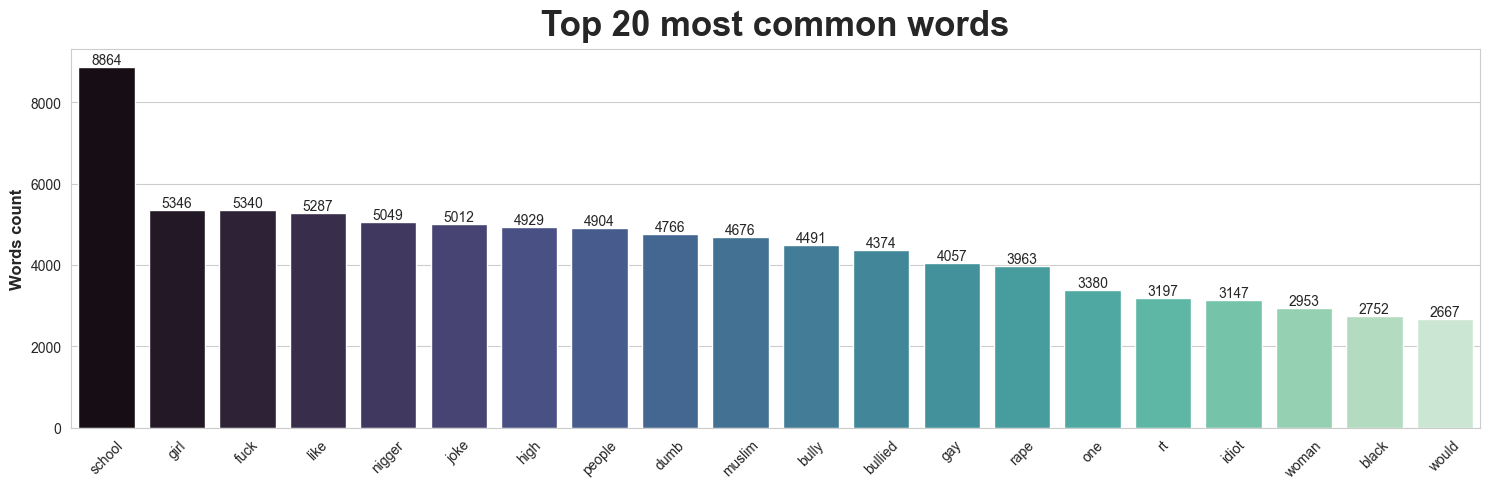

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=keys, y=values, palette='mako')
plt.title('Top 20 most common words', size=25)
plt.ylabel("Words count")
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability

# Adding labels on top of each bar
for i, v in enumerate(values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()